In [ ]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#training and testing directory
train_dir = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test_dir = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [ ]:
train_dir.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#defining train labels and train sets
train_label = np.array(train_dir['label'])
train_ds = np.array(train_dir.drop(['label'], axis = 1))

#defining test labels and test sets
test_label = np.array(test_dir['label'])
test_ds = np.array(test_dir.drop(['label'], axis = 1))

In [ ]:
#feature scaling
train_ds = train_ds/255.

#reshaping for the input of neural network(shape of input image 28x28)
train_ds = train_ds.reshape(-1,28,28,1)

#feature scaling
test_ds = test_ds/255.

#reshaping for the input of neural network
test_ds = test_ds.reshape(-1,28,28,1)

In [ ]:
#test labels and training labels are in range(0,9),hence applying onehotecoding()
from tensorflow.keras.utils import to_categorical
train_label = to_categorical(train_label,10)
test_label = to_categorical(test_label,10)

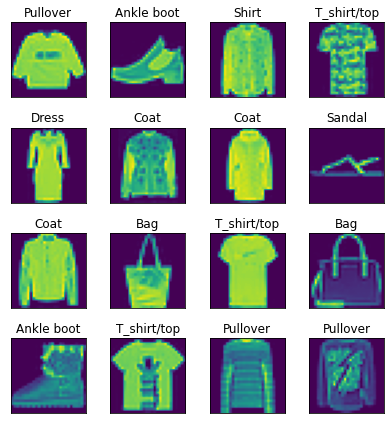

In [ ]:
#classes of training set
names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_ds[i])
    plt.title(names[train_label[i].argmax()])
    plt.tight_layout()
plt.show()

In [ ]:
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout

#defining the model as a sequence of layers.
model = keras.models.Sequential()

#adding 1st Convolutional layer
model.add(Conv2D(filters = 32,kernel_size = 3,activation = 'relu' ,input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))

#flattening the output
model.add(Flatten())

#adding dense layer
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.3))

#adding final layer
model.add(Dense(10,activation = "softmax"))

#compiling the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

#training the model
cnn = model.fit(train_ds,train_label, epochs=20,batch_size = 32 ,validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.0454 - accuracy: 0.6506 - val_loss: 0.4986 - val_accuracy: 0.8272
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5331 - accuracy: 0.8113 - val_loss: 0.4369 - val_accuracy: 0.8428
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4733 - accuracy: 0.8320 - val_loss: 0.4113 - val_accuracy: 0.8488
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4302 - accuracy: 0.8484 - val_loss: 0.3730 - val_accuracy: 0.8675
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4043 - accuracy: 0.8585 - val_loss: 0.3582 - val_accuracy: 0.8713
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3800 - accuracy: 0.8650 - val_loss: 0.3427 - val_accuracy: 0.8732
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3663 - accuracy: 0.8704 - val_loss: 0.3307 - val_accuracy:

In [ ]:
#summary of model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                346176    
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [ ]:
#evaluating model on test set
model.evaluate(test_ds,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.2516 - accuracy: 0.9099


[0.2515706419944763, 0.9099000096321106]

In [ ]:
#storing predictions in variable(pred)
pred=model.predict(test_ds,verbose=1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
#saving index of maximum value of pred in preds
preds = []
for i in range(0,len(pred)):
    preds.append(pred[i].argmax())

#saving index of maximum value of training set in actual
actual = []
for i in range(0,len(test_label)):
    actual.append(test_label[i].argmax())

In [ ]:
#classification report
from sklearn import metrics
report = metrics.classification_report(actual, preds, target_names=names)
print(report)

              precision    recall  f1-score   support

 T_shirt/top       0.86      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.90      0.83      0.86      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.84      0.89      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.73      0.75      0.74      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



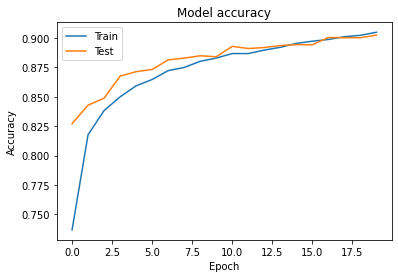

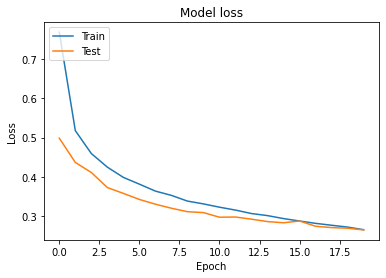

In [ ]:
#graph for accuracy
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#graph for loss
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Visualizing true labels with predicted labels for some images from the test set
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_ds[i].reshape(28, 28), cmap=plt.cm.binary)
    true_label = names[np.argmax(test_label[i])]
    pred_label = names[preds[i]]
    plt.title(f'True: {true_label}\nPredicted: {pred_label}', color='green' if true_label == pred_label else 'red')
plt.tight_layout()
plt.show()